**Train a Neural Network for XOR Problem: Design a small feedforward neural network with at
least one hidden layer to solve the non-linear XOR classification problem. Show training
performance and visualize the learned decision boundary.**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Creating XOR dataset

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])


Building Neural Network

In [3]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='relu'))  # hidden layer
model.add(Dense(1, activation='sigmoid'))            # output layer

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    X, y,
    epochs=500,
    verbose=0
)


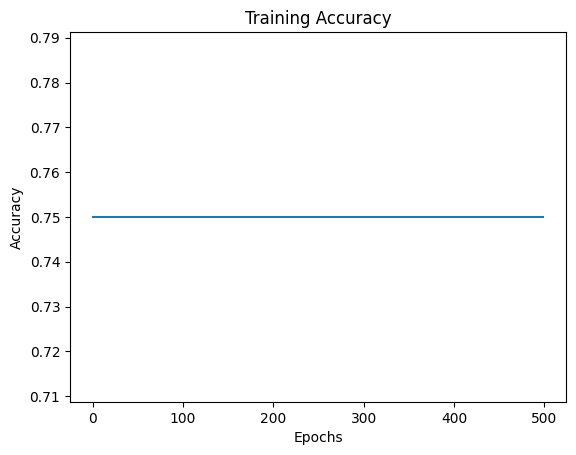

In [5]:
#Training Performance Visualising
plt.plot(history.history['accuracy'])
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [6]:
predictions = model.predict(X)
print("Predicted probabilities:")
print(predictions.round(3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted probabilities:
[[0.422]
 [0.537]
 [0.581]
 [0.597]]


Visualising Decision Boundary

In [7]:
xx, yy = np.meshgrid(
    np.linspace(-0.5, 1.5, 200),
    np.linspace(-0.5, 1.5, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]


In [8]:
Z = model.predict(grid)
Z = Z.reshape(xx.shape)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


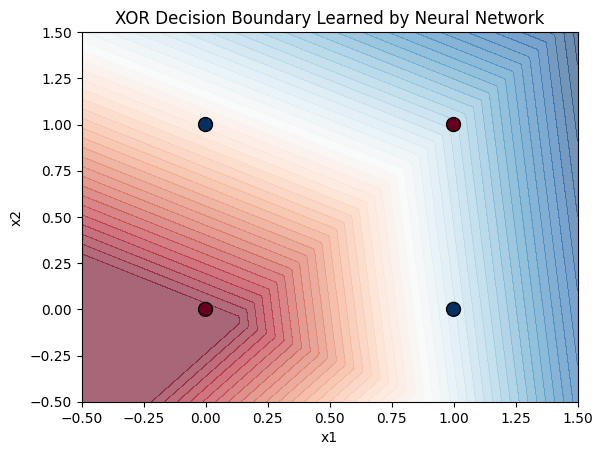

In [9]:
plt.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='RdBu', s=100)
plt.title("XOR Decision Boundary Learned by Neural Network")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
